# Hierarchical Clustering

- Like most clustering algorithms, Hierarchical Clustering simply relies on measuring which data points are most “similar” to other data points. "Similarity” is defined by choosing a distance metric.
---
So why use Hierarchical Clustering?
- Easy to understand and visualize.
- Helps users decide how many clusters to choose.
- Not necessary to choose cluster amount _before_ running the algorithm.
---
Divides points into _potential_ clusters:
- Agglomerative Approach: Each point begins as its own cluster, then clusters are joined. 
- Divisive Approach: All points begin in the same cluster, then clusters are split.
---
Hierarchical Clustering Process
- Compare data points to find most similar data points to each other.
- Merge these to create a cluster.
- Compare clusters to find most similar clusters and merge again.
- Repeat until all points in a single cluster.
---
Similarity Metric: Measures distance between two points. Many options:

.
<img src='images/HC1.png' width='250'>
- Euclidean Distance (default)
- Manhattan
- Cosine
---
Dendrogram

.
<img src='images/HC2.png' width='250'>
<img src='images/HC3.png' width='250'>
- Plot displaying all potential clusters.
- Very computationally expensive to compute and display for larger data sets.
- Very useful for deciding on number of clusters.
---
Linkage Matrix
- Once two or more points are together and we want to continue agglomerative clustering to join clusters, we need to decide on a _linkage parameter_.
    - Ward: minimizes variance of clusters being merged.
    - Average: uses average distances between two sets.
    - Minimum or Maximum distances between all observations of the two sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('data/cluster_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
df_w_dummies = pd.get_dummies(df.drop(columns='name'))

In [5]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
# preferred scaling for Hierarchical Clustering

scalar = MinMaxScaler()
scalar_data = scalar.fit_transform(df_w_dummies)

In [7]:
# np.array --> pd.DataFrame
scaled_df = pd.DataFrame(scalar_data, columns=df_w_dummies.columns)

## Hierarchical Clusterting with Seaborn (col_cluster=False)

<Figure size 1500x800 with 0 Axes>

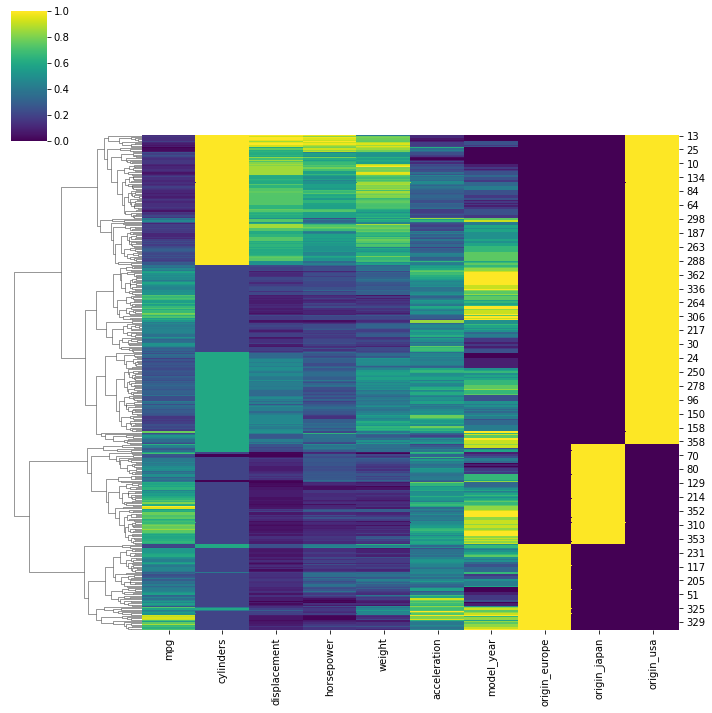

In [8]:
plt.figure(figsize=(15,8), dpi=100);
sns.clustermap(scaled_df, cmap='viridis', col_cluster=False);
# col_cluster => correlation b/w features
# row_cluster => clustering of instances (Dendogram)

- Seaborn can't provide such heatmap with clusters as dendograms for large data!

## Hierarchical Clusterting with Sklearn (AgglomerativeClustering)

In [9]:
from sklearn.cluster import AgglomerativeClustering

### Choosing n_clusters beforehand

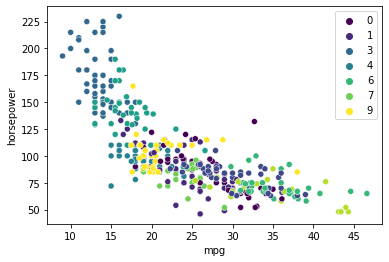

In [10]:
model = AgglomerativeClustering(n_clusters=10)
cluster_labels = model.fit_predict(scaled_df)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels,
                palette='viridis');

### Using affinity hyperparameter (distance metric)

In [11]:
# max distance possible b/w two pts, i.e. D = sqrt(n)
print(f"The theoretical max D = {np.sqrt(len(scaled_df.columns))}")

The theoretical max D = 3.1622776601683795


In [12]:
# lets check the min and max pts for mpg
(scaled_df['mpg'].idxmin(), scaled_df['mpg'].idxmax())

(28, 320)

In [13]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

dist_ab = np.linalg.norm(car_a-car_b)
print(f"The realistic max D = {dist_ab}")

The realistic max D = 2.3852929970374714


[ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  1  4  4  4  1  0  0  0  0  0
  4  3  3  3  3  1  7  1  4  4  4  4  4  3  3  3  3  3  3  3  4  7  4  4
  7  0  0  0  1  1  0  7  1  7  0  7  7  3  3  3  3  3  3  3  3  3  1  3
  3  3  3  0  0  0  0  7  1  1  7  1  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  0  3  3  3  3  4  1  7  1  1  7  4  0  3  3  0  0  0  0
  3  0 10  3  4  4  4  1  7  1  7  4  4  4  3  3  3  3  3  0  0  0  1  1
  7  0  0  1  1  0  4  4  4  4  5  3  3  3  4  4  4  4  4  5  5  1  7  4
  7  1  0  1  4  0  4  0  0  0  0  1  0  0  7  7  0  5  5  5  5  4  4  4
  4  7  7  0  1  9  4  9  4  0  1  1  7  0  5  8 10  0  5  5  5  5  1  2
  8  7  1  5  5  5  5  9  9  9  9  5  5  5  5  0  7  1  7  2  2  1  0 10
  0 10  8  2  1  6  1  5  5  5  9  9  9  7  9  9  9  9  9  9  5  9  5  5
  2 10 10  2 10  2  2 10  0  0  0  0  8  1  9  9  2  9  9  5  5  5  5  5
  5  5  5  8  1  2  2  8  5  8  5  2  2  1  8  2  9  9  2  8  6  2  6  2
  2  2  9  8  6  6  6  6  6  2  6  8  8  8  8  6  6

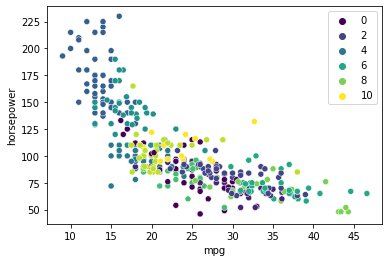

In [14]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
cluster_labels = model.fit_predict(scaled_df)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels,
                palette='viridis');
print(cluster_labels)

In [15]:
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix


array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

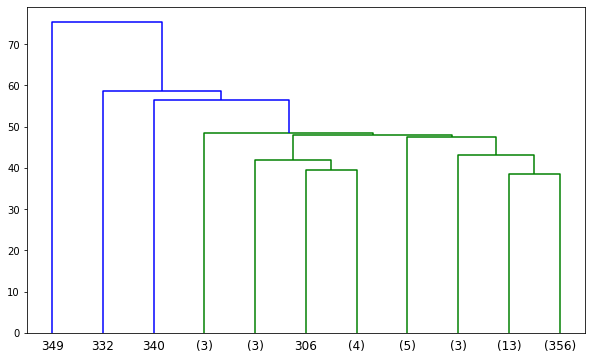

In [18]:
from scipy.cluster.hierarchy import  dendrogram

plt.figure(figsize=(10,6))
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11)